<a href="https://colab.research.google.com/github/afif-af/python_data_analysis/blob/main/PythonDataSciecnceHandbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NaiveBias

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

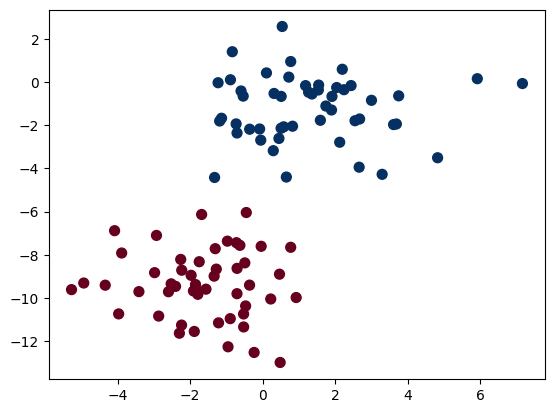

In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50,cmap='RdBu')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y)

GaussianNB()

In [ ]:
rng=np.random.RandomState(0)
Xnew=[-6, -14]+[14,18]*rng.rand(2000,2)
ynew=model.predict(Xnew)

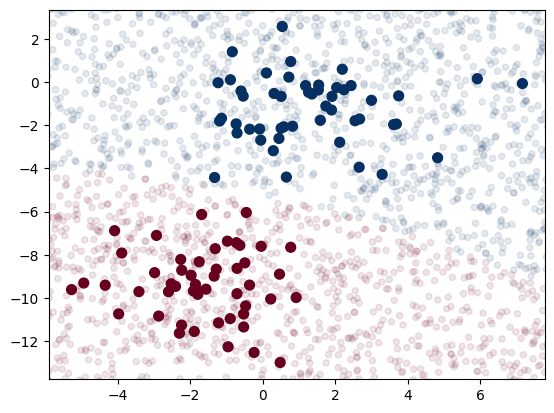

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1],c=ynew,s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob=model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories=['talk.religion.misc','soc.religion.christian',
            'sci.space','comp.graphics']
train=fetch_20newsgroups(subset='train', categories=categories)
test=fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [ ]:
model.fit(train.data,train.target)
labels=model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

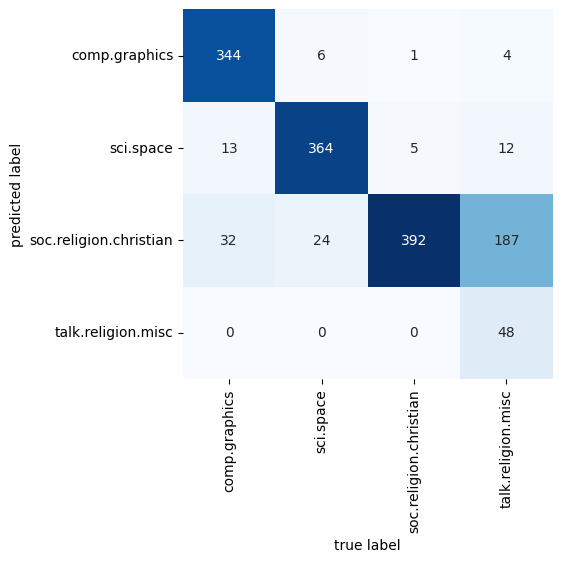

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
def predict_category(s, train=train,model=model):
  pred=model.predict([s])
  return train.target_names[pred[0]]


In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determing the screen resolution')

'comp.graphics'

#PCA

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


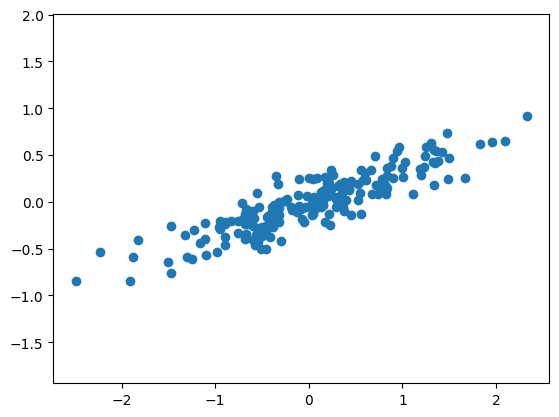

In [ ]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


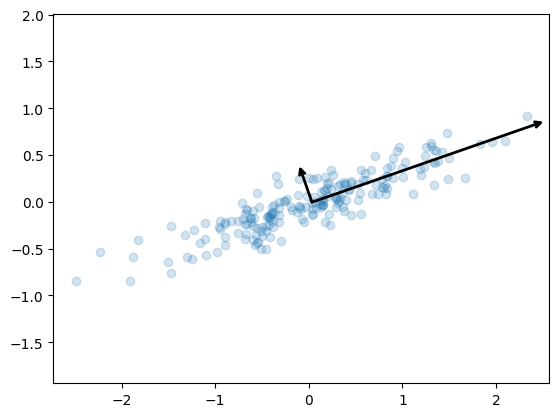

In [ ]:
def draw_vector(v0,v1,ax=None):
  ax=ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
  ax.annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v=vector * 3* np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
pca =PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print('original shape: ',X.shape)
print('transformed shape:',X_pca.shape)


original shape:  (200, 2)
transformed shape: (200, 1)


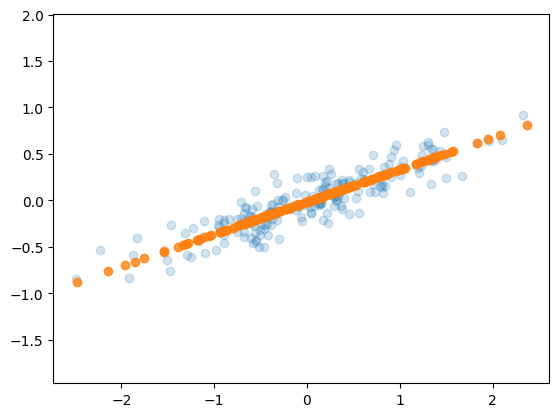

In [ ]:
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca=PCA(2)
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipython-input-74-1742390641.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow',10))


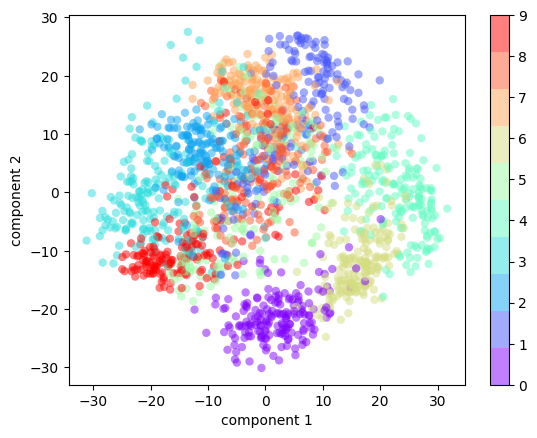

In [ ]:
plt.scatter(projected[:,0],projected[:,1],
            c=digits.target, edgecolor='none',alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

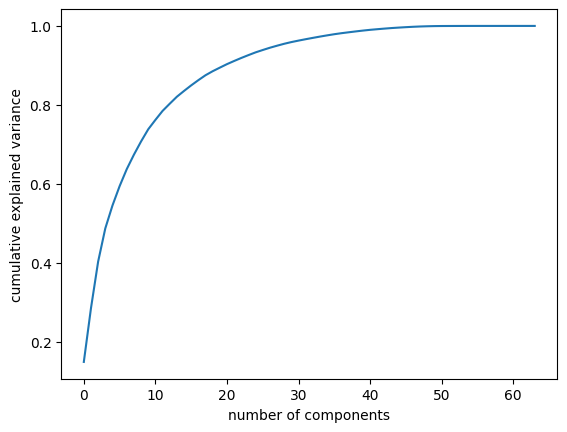

In [ ]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

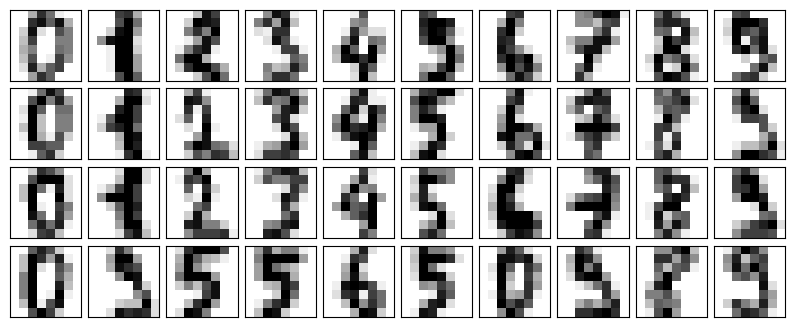

In [ ]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4),
  subplot_kw={'xticks':[], 'yticks':[]},
  gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8),
      cmap='binary', interpolation='nearest',
      clim=(0, 16))
plot_digits(digits.data)

In [ ]:
rng = np.random.default_rng(42)
rng.normal(10, 2)

10.609434159508863

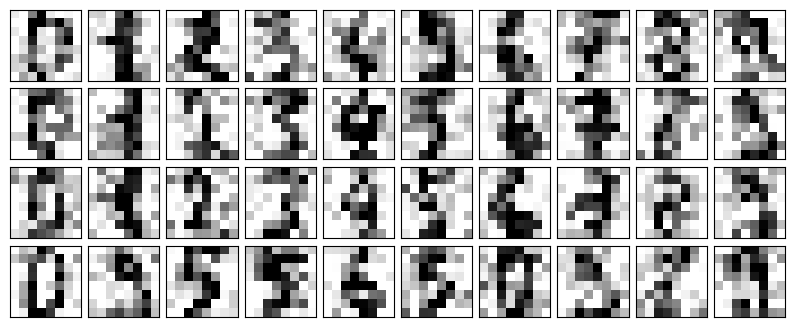

In [ ]:
rng=np.random.default_rng(42)
noisy=rng.normal(digits.data,4)
plot_digits(noisy)

In [ ]:
pca=PCA(0.50).fit(noisy)
pca.n_components_

np.int64(12)

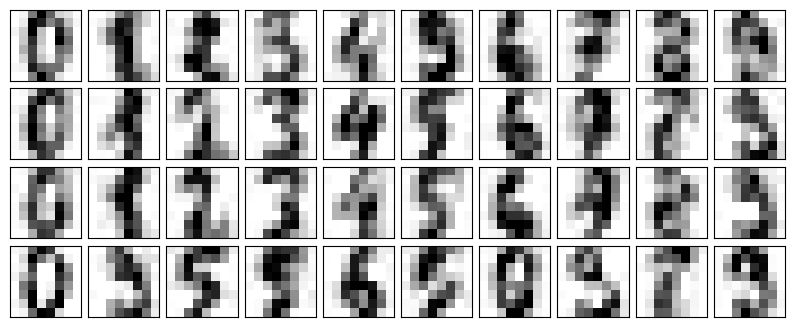

In [ ]:
Components=pca.transform(noisy)
filtered=pca.inverse_transform(Components)
plot_digits(filtered)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
pca=PCA(150, svd_solver='randomized', random_state=42)
pca.fit(faces.data)


PCA(n_components=150, random_state=42, svd_solver='randomized')

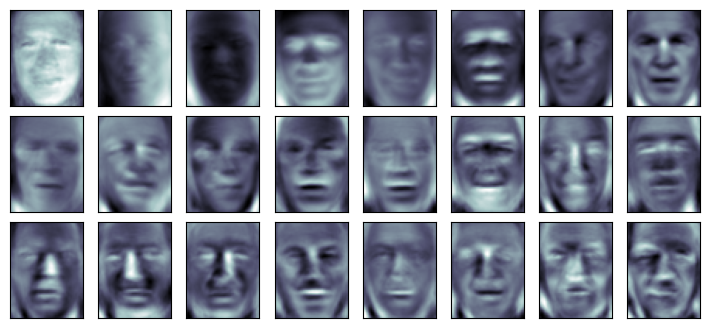

In [ ]:
fig,axes=plt.subplots(3,8,figsize=(9,4),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

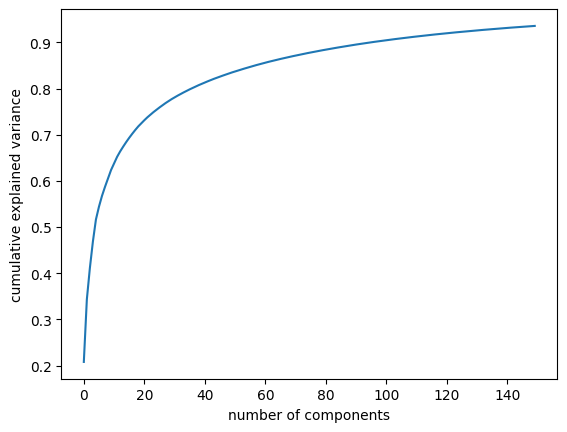

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca=pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

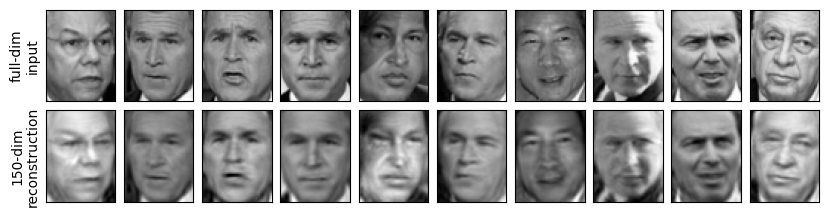

In [ ]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
  ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
  ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

#Manifold

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn
# plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
def make_hello(N=1000,rseed=42):
  fig, ax=plt.subplots(figsize=(4,1))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
  ax.axis('off')
  ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold',size=85)
  fig.savefig('hello.png')
  plt.close(fig)

  from matplotlib.image import imread
  data=imread('hello.png')[::-1,:,0].T
  rng=np.random.RandomState(rseed)
  X=rng.rand(4*N,2)
  i, j=(X*data.shape).astype(int).T
  mask=(data[i,j]<1)
  X=X[mask]
  X[:,0]*=(data.shape[0]/data.shape[1])
  X=X[:N]
  return X[np.argsort(X[:,0])]

/tmp/ipython-input-89-1348210481.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))


(np.float64(-0.19972965643412033),
 np.float64(4.195346643588747),
 np.float64(0.02244321091604335),
 np.float64(0.990457146590137))

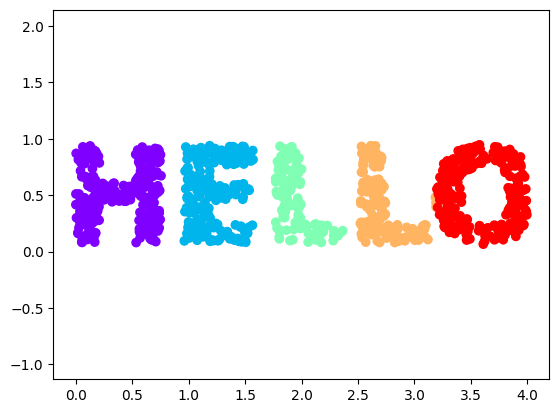

In [ ]:
X=make_hello(1000)
colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

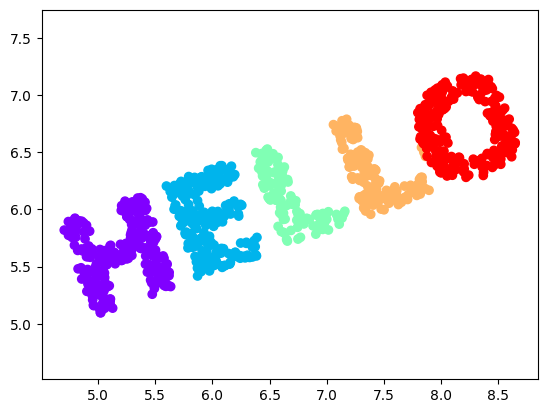

In [ ]:
def rotate(X, angle):
  theta = np.deg2rad(angle)
  R = [[np.cos(theta), np.sin(theta)],
  [-np.sin(theta), np.cos(theta)]]
  return np.dot(X, R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [ ]:
from sklearn.metrics import pairwise_distances
D=pairwise_distances(X)
D.shape

(1000, 1000)

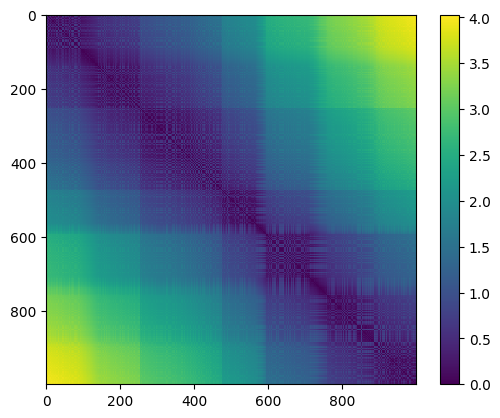

In [ ]:
plt.imshow(D,zorder=1,cmap='viridis', interpolation='none')
plt.colorbar()

In [ ]:
D2=pairwise_distances(X2)
np.allclose(D,D2)


True

(np.float64(-2.1789617687121843),
 np.float64(2.060392447437197),
 np.float64(-1.2485023605093946),
 np.float64(1.2485687655537223))

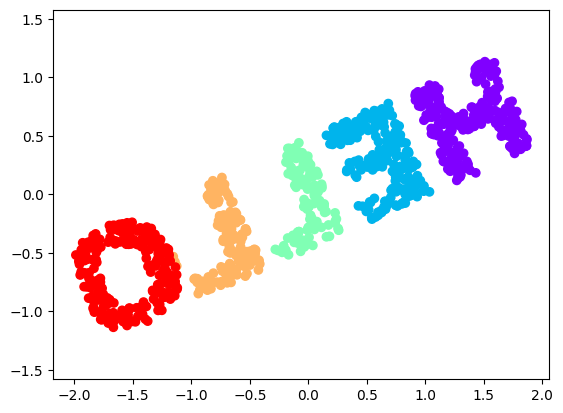

In [ ]:
from sklearn.manifold import MDS
model=MDS(n_components=2, dissimilarity='precomputed', random_state=1701)
out=model.fit_transform(D)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')

In [ ]:
def random_projection(X,dimension=3,rseed=42):
  assert dimension >= X.shape[1]
  rng = np.random.RandomState(rseed)
  C = rng.randn(dimension, dimension)
  e, V = np.linalg.eigh(np.dot(C, C.T))
  return np.dot(X, V[:X.shape[1]])
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

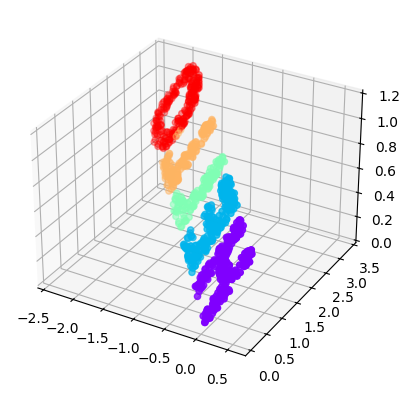

In [ ]:
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],**colorize);

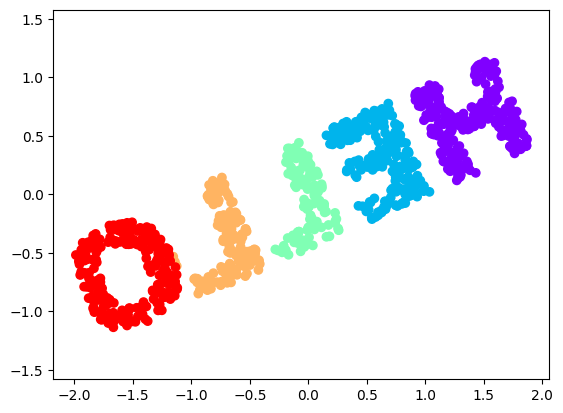

In [ ]:
model=MDS(n_components=2,random_state=1701)
out3=model.fit_transform(X3)
plt.scatter(out3[:,0],out[:,1],**colorize)
plt.axis('equal');